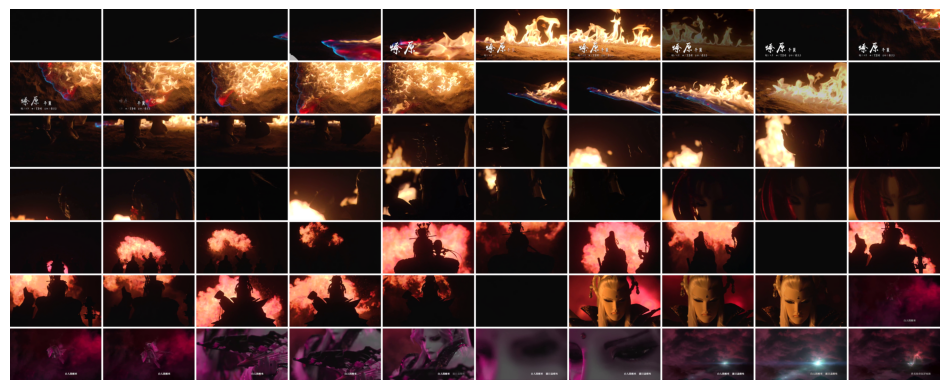

True

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取视频文件
video_path = "movies/03.mp4"  # 替换成你的视频文件路径
video_capture = cv2.VideoCapture(video_path)

# 初始化变量
frames = []
grid_shape = (10, 7)  # 网格形状（列、行）
border = 5  # 边框以像素为单位
captured_frames = 0
time_interval = 500  # 100ms间隔

while captured_frames < grid_shape[0] * grid_shape[1]:
    # 设置视频位置
    video_capture.set(cv2.CAP_PROP_POS_MSEC, captured_frames * time_interval)
    
    ret, frame = video_capture.read()
    if not ret:
        print("Failed to grab frame")
        break

    # 转换为RGB格式（OpenCV默认加载BGR格式的图像）
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame_rgb)
    
    captured_frames += 1

video_capture.release()

# 计算网格尺寸
frame_height, frame_width, _ = frames[0].shape
grid_width = grid_shape[0] * frame_width + (grid_shape[0] - 1) * border * 5
grid_height = grid_shape[1] * frame_height + (grid_shape[1] - 1) * border * 5

# 创建一个空网格，填充白色
grid = np.ones((grid_height, grid_width, 3), np.uint8) * 255

# 用框架填充网格
for i in range(grid_shape[1]):
    for j in range(grid_shape[0]):
        y_start = i * (frame_height + border*5)
        x_start = j * (frame_width + border*5)

        idx = i * grid_shape[0] + j
        if idx >= len(frames):
            break

        grid[y_start:y_start + frame_height, x_start:x_start + frame_width, :] = frames[idx]

# 使用 Matplotlib 显示网格
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.imshow(grid)
plt.show()

# 保存网格
cv2.imwrite("grid.png", grid)
